# Testing of Label Encoding and Feature Extraction followed by a Machine Learning Model

### Initial Setup

In [1]:
import os, joblib
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

/home/alimuhammad/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Define Data directory
DATA_DIR = '../data/'

# list of poet names
poets = ["abbasinYousuf", "azizMazerwal", "ghaniKhan", "hamzaBaba", "khaliqZiari", "khatirAfridi", "khushalKhanKhattak", "mumtazOrakazi", "munirJan", "rahmanBaba", "rehmatShah", "sahibShahSabir", "salimRiaz"]

poet_labels = {poet: i for i, poet in enumerate(poets)}
print(poet_labels)

{'abbasinYousuf': 0, 'azizMazerwal': 1, 'ghaniKhan': 2, 'hamzaBaba': 3, 'khaliqZiari': 4, 'khatirAfridi': 5, 'khushalKhanKhattak': 6, 'mumtazOrakazi': 7, 'munirJan': 8, 'rahmanBaba': 9, 'rehmatShah': 10, 'sahibShahSabir': 11, 'salimRiaz': 12}


In [3]:
# Load and Label the Data
def load_and_label(data_dir, poets, poet_labels):
    data = []
    labels = []

    for poet in poets:
        poet_dir = os.path.join(data_dir, poet)
        file_path = os.path.join(poet_dir, f'{poet}.txt')

        # Check if the file exists
        if not os.path.exists(file_path):
            print(f'{file_path} does not exist')
            continue

        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
            data.extend(lines)
            labels.extend([poet_labels[poet]] * len(lines))
    
    df = pd.DataFrame({'text': data, 'label': labels})
    return data, labels, df

In [4]:
data, labels, df = load_and_label(DATA_DIR, poets, poet_labels)
df.describe()

,label
count,30354.000000
mean,7.198854
std,2.391132
min,0.000000
25%,6.000000
50%,7.000000
75%,9.000000
max,12.000000


In [7]:
def extract_features(df, num_features=None):
    tfidf_vectorizer = TfidfVectorizer(max_features=num_features)
    # tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X = tfidf_vectorizer.fit_transform(df['text']).toarray()
    y = df['label'].values
    return X, y, tfidf_vectorizer

In [8]:
X, y, tfidf_vectorizer = extract_features(df, 5000)

In [9]:
print(f"Number of samples: {len(df)}")
print(f"Number of features (TF-IDF): {X.shape[1]}")
print(f"Class distribution:\n{df['label'].value_counts()}")

Number of samples: 30354
Number of features (TF-IDF): 5000
Class distribution:
label
9     8903
6     8541
7     3609
3     2574
11    2106
5     1306
10     973
8      909
2      563
12     496
0      234
4       80
1       60
Name: count, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24283, 5000), (6071, 5000), (24283,), (6071,))

### Support Vector Machine (SVM) Model with TF-IDF Vectorization

Training the SVM model...

Model Performance and Evaluation
Accuracy: 0.8224
F1 Score (Weighted): 0.8129
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.26      0.40        47
           1       0.75      0.25      0.38        12
           2       0.82      0.38      0.52       112
           3       0.72      0.66      0.69       515
           4       0.00      0.00      0.00        16
           5       0.72      0.59      0.65       261
           6       0.88      0.94      0.91      1708
           7       0.72      0.84      0.78       722
           8       0.74      0.42      0.54       182
           9       0.89      0.95      0.92      1781
          10       0.78      0.60      0.68       195
          11       0.68      0.73      0.70       421
          12       0.64      0.38      0.48        99

    accuracy                           0.82      6071
   macro avg       0.71      0.54      0.59      6071
weight

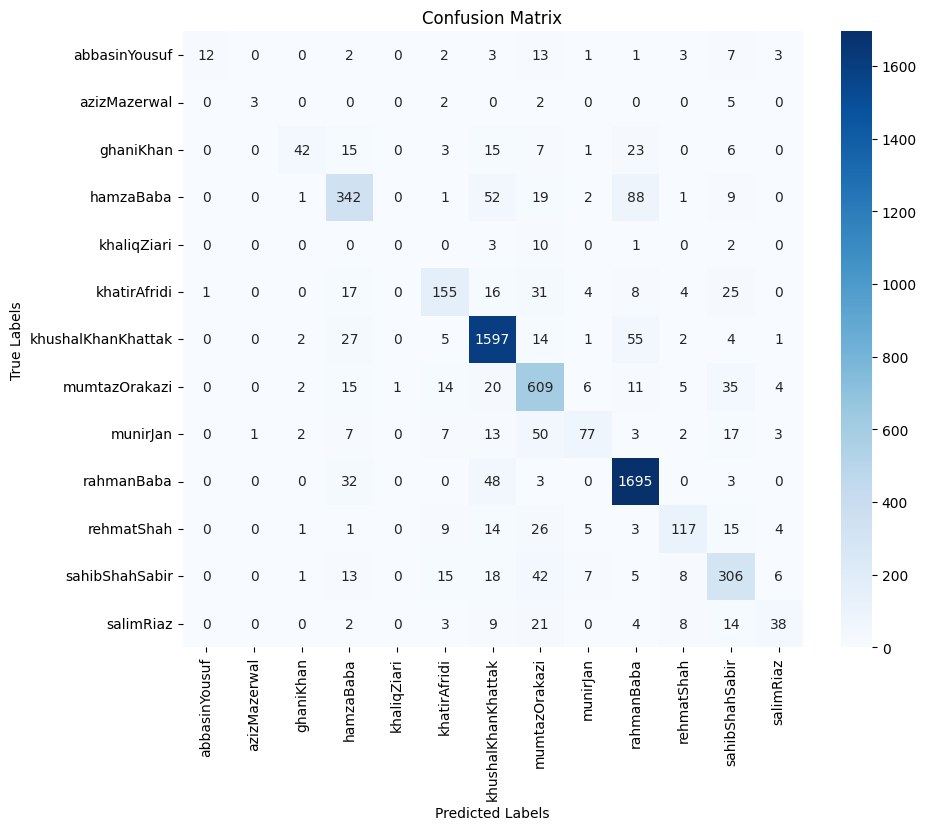

In [9]:
# SVM Model
svm = SVC(kernel='linear', random_state=42)

# Training and predictions
print(f"Training the SVM model...")
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix') 
plt.show()


# svm_param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }


# print(f"Training the SVM model...")
# svm_model = train_and_evaluate_model(svm, svm_param_grid, X_train, X_test, y_train, y_test)


Model Performance and Evaluation
Accuracy: 0.8224
F1 Score (Weighted): 0.8129
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.26      0.40        47
           1       0.75      0.25      0.38        12
           2       0.82      0.38      0.52       112
           3       0.72      0.66      0.69       515
           4       0.00      0.00      0.00        16
           5       0.72      0.59      0.65       261
           6       0.88      0.94      0.91      1708
           7       0.72      0.84      0.78       722
           8       0.74      0.42      0.54       182
           9       0.89      0.95      0.92      1781
          10       0.78      0.60      0.68       195
          11       0.68      0.73      0.70       421
          12       0.64      0.38      0.48        99

    accuracy                           0.82      6071
   macro avg       0.71      0.54      0.59      6071
weighted avg       0.82      0.8

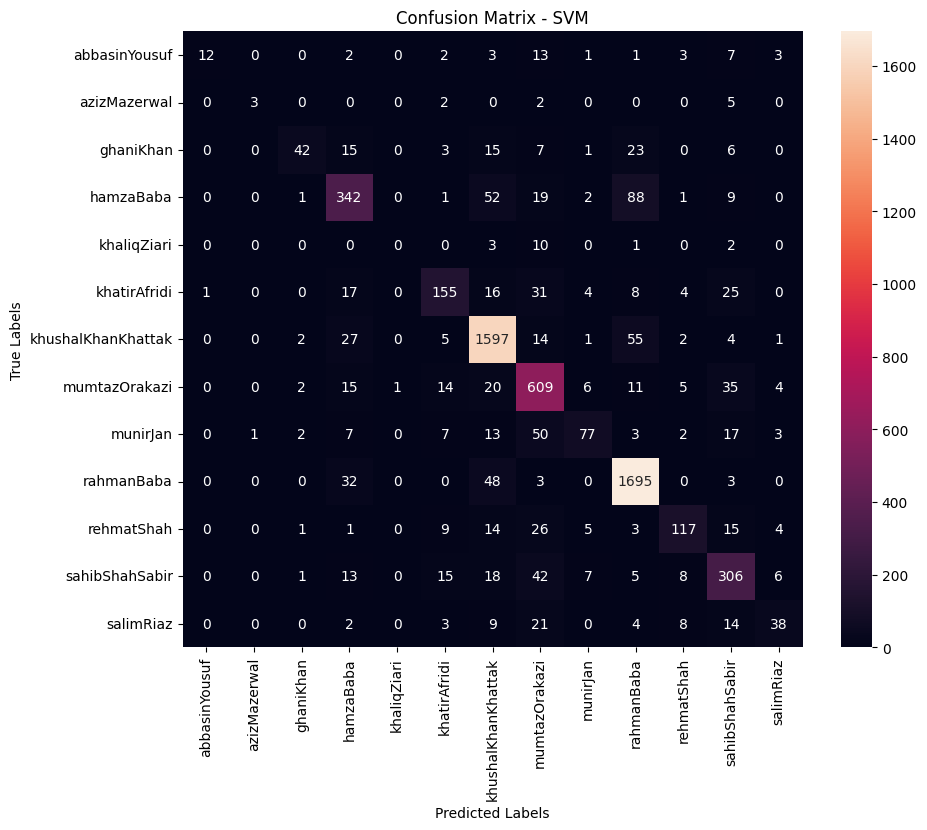

In [11]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM') 
plt.show()
